In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PR-Project/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df['Potability']=df['Potability'].astype('category')

In [ ]:
#create approve limit for each features based on data available in Google search
cols=df.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

In [ ]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690300,20927.833605,27332.762125,61227.196010
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792305,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
#Replace null values based on the group/sample mean

df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [ ]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


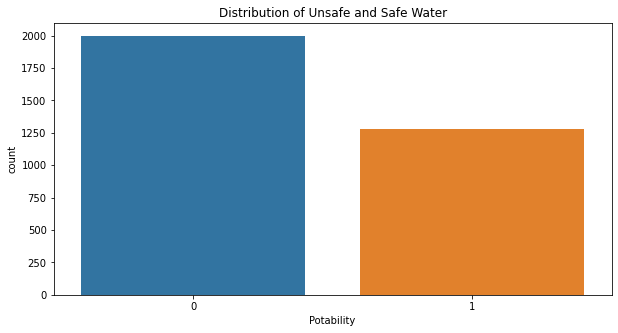

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(df['Potability'])
plt.title("Distribution of Unsafe and Safe Water")
plt.show()

In [ ]:
##min max value
limit

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.52,0,500,0,3,0,0,0,0
1,6.83,0,1000,4,250,400,2,80,5


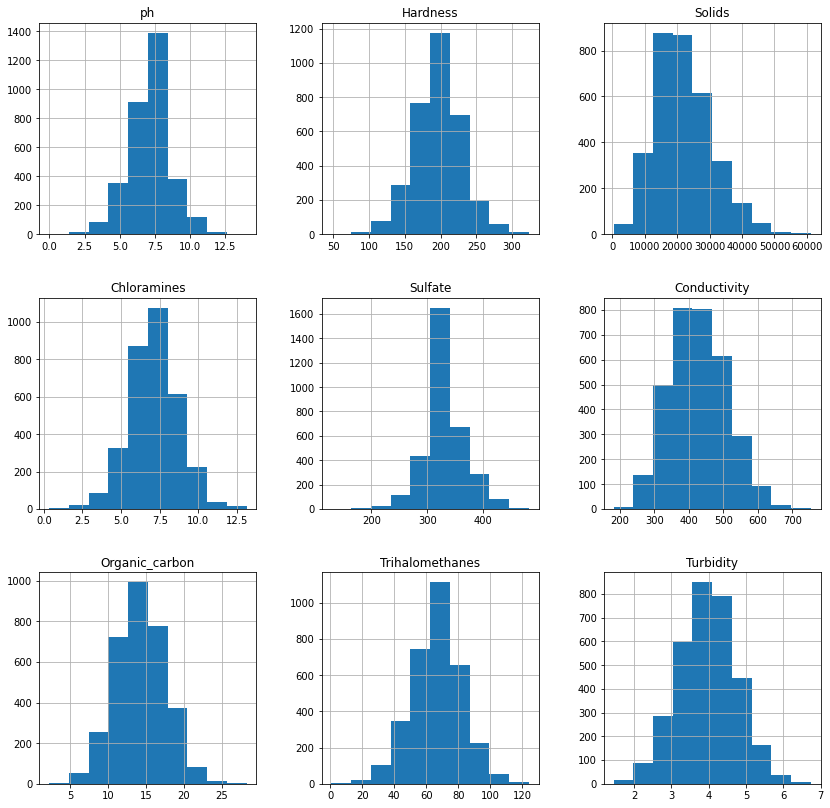

In [ ]:
df.hist(figsize=(14,14))
plt.show()

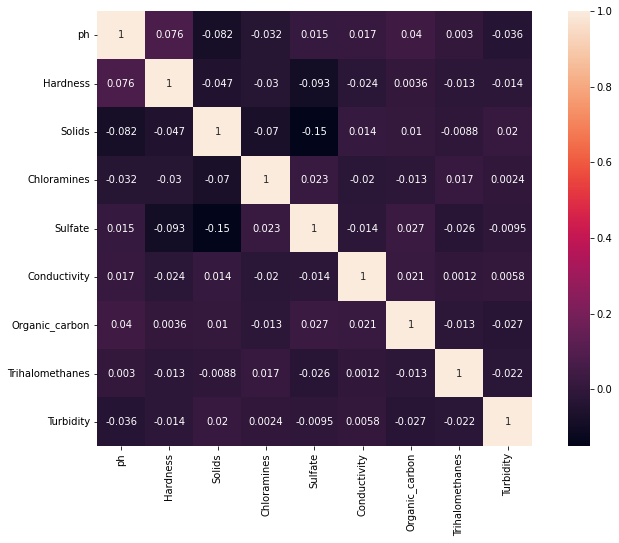

In [ ]:
fig=plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True, square=True)

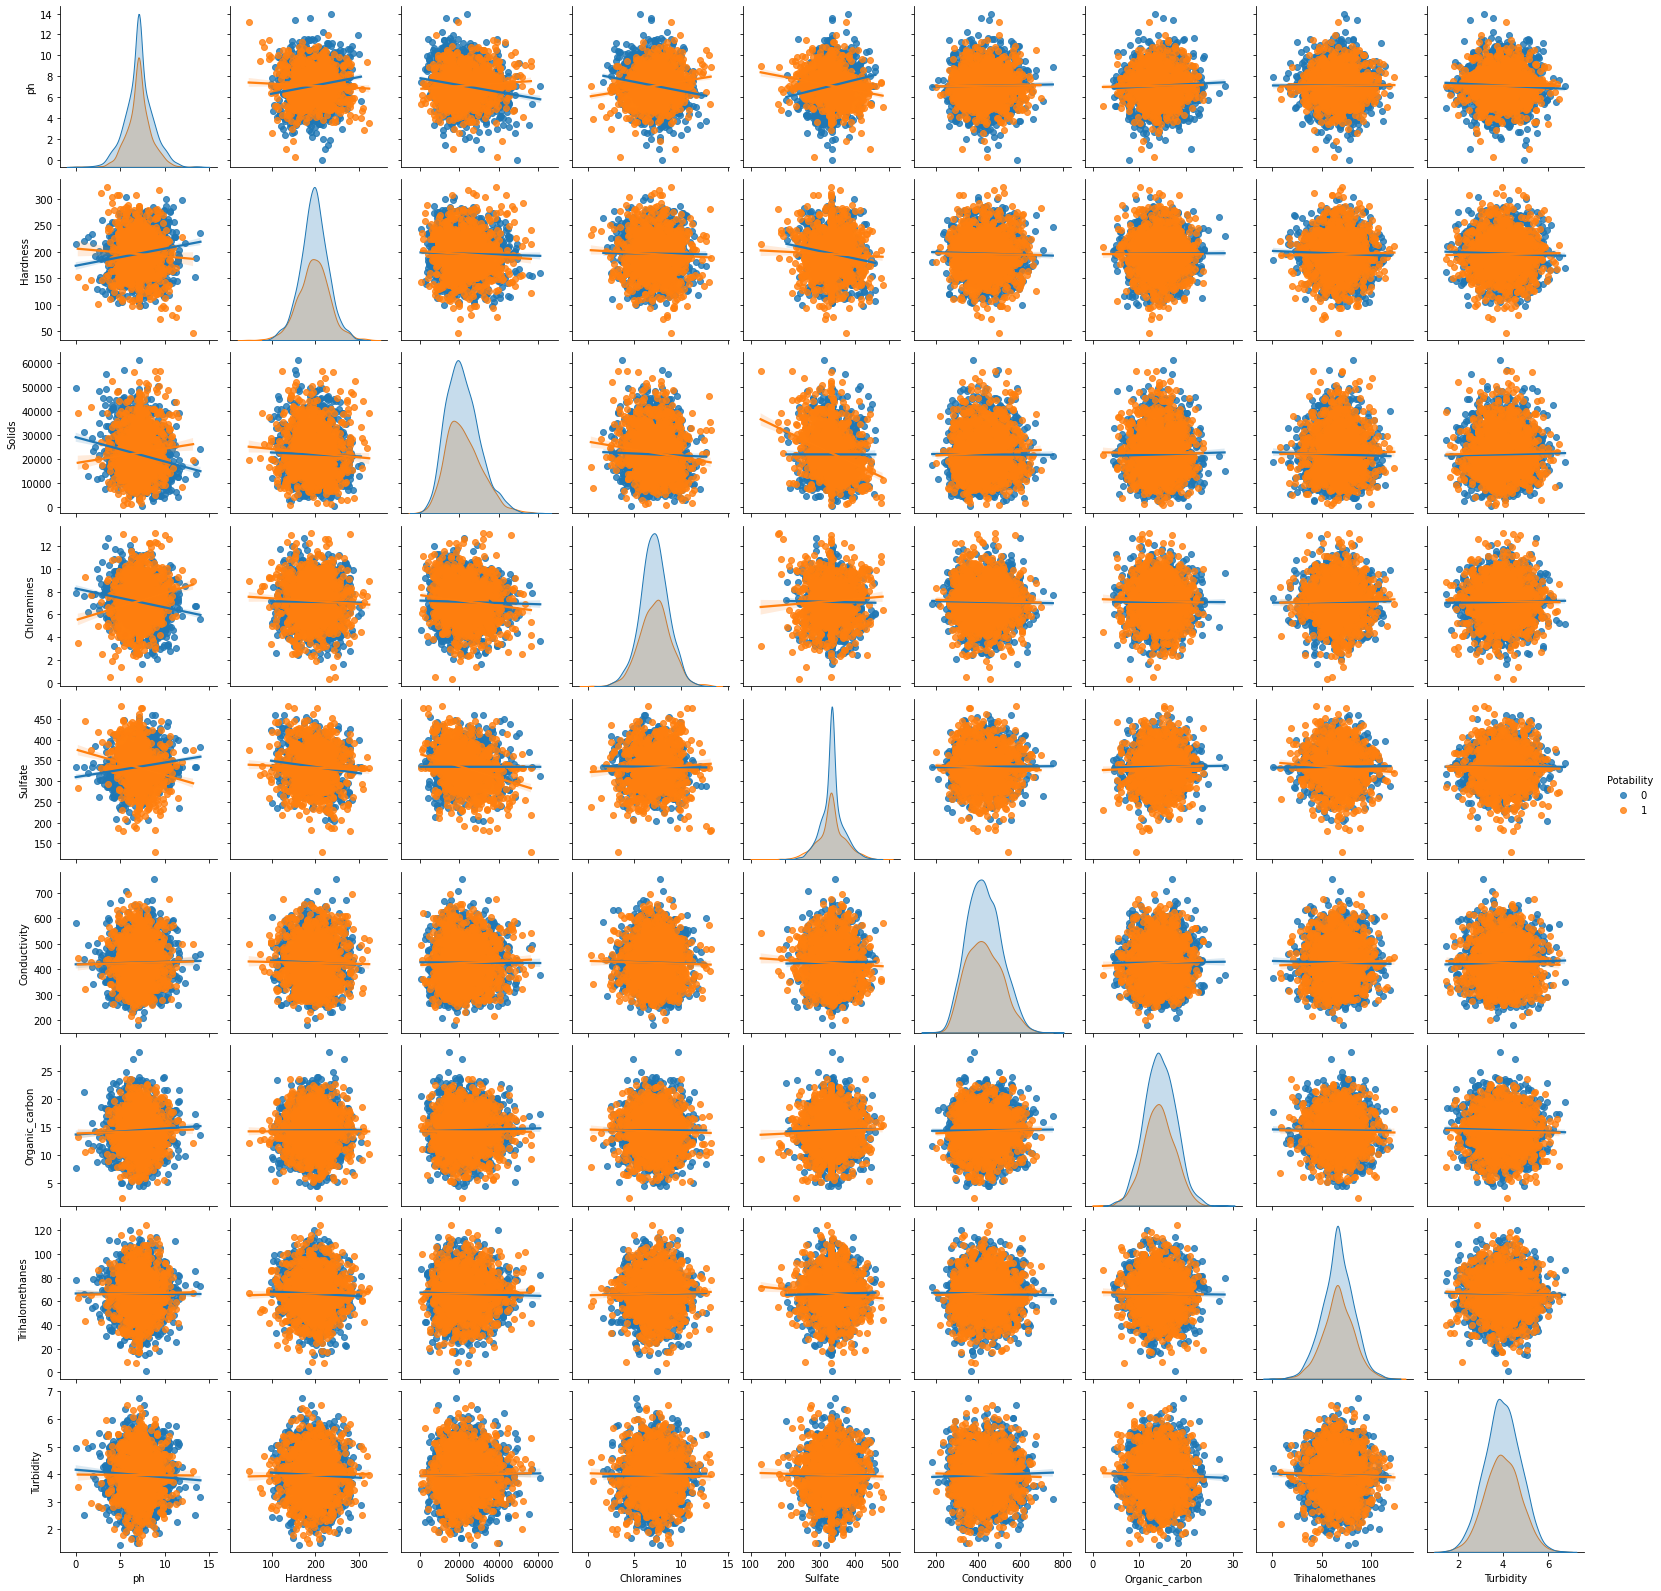

In [ ]:
sns.pairplot(df, hue='Potability', kind='reg')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df[df.columns.difference(['Potability'])])
minmax = scaler.transform(df[df.columns.difference(['Potability'])])
minmax_df = pd.DataFrame(minmax,columns = [df[df.columns.difference(['Potability'])].columns])
models_scores = pd.DataFrame()

In [ ]:
minmax_df.describe()

,Chloramines,Conductivity,Hardness,Organic_carbon,Solids,Sulfate,Trihalomethanes,Turbidity,ph
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,0.529963,0.427940,0.540231,0.463026,0.356173,0.581725,0.532668,0.475853,0.505775
std,0.123921,0.141336,0.119263,0.126750,0.143968,0.102678,0.127938,0.147548,0.104997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.452088,0.322196,0.469432,0.378000,0.251957,0.534313,0.453584,0.376198,0.448405
50%,0.530591,0.420386,0.542401,0.460473,0.338338,0.583939,0.531920,0.473630,0.506098
75%,0.607662,0.525145,0.613857,0.550102,0.443498,0.628882,0.615994,0.576729,0.562146
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Y = df.pop('Potability')
X = minmax_df 

In [ ]:
from imblearn.over_sampling import SMOTE
#from sklearn.preprocessing import StandardScaler
sm = SMOTE(k_neighbors=4)
X,Y =sm.fit_resample(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print(X.shape)
print(Y.shape)

(3996, 9)
(3996,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3196, 9)
(3196,)
(800, 9)
(800,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier(min_samples_split=10)

In [ ]:
prediction=dt.predict(X_test)
Accuracy_Score1 = accuracy_score(Y_test,prediction)*100
print("Acccuracy =", Accuracy_Score1)
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,prediction)}")
print(f"Classification Report =\n {classification_report(Y_test,prediction)}")

Acccuracy = 76.25
Confusion Matrix =
 [[305  89]
 [101 305]]
Classification Report =
               precision    recall  f1-score   support

           0       0.75      0.77      0.76       394
           1       0.77      0.75      0.76       406

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
model_acc =pd.DataFrame({'Model Name':['DecisionTreeClassifier'],'Accuracy':[Accuracy_Score1]}) 
models_scores=models_scores.append(model_acc,ignore_index=True)
models_scores.sort_values(by=['Accuracy'],ascending=False,ignore_index=True)

,Model Name,Accuracy
0,DecisionTreeClassifier,76.25


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


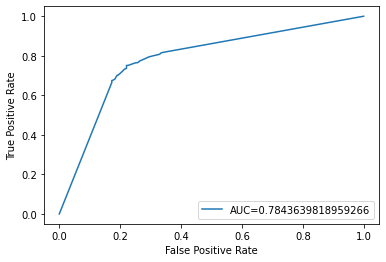

In [ ]:
#define metrics
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
abc.fit(X_train,Y_train)
pred_abc =abc.predict(X_test)





/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
prediction=abc.predict(X_test)
Accuracy_Score2 = accuracy_score(Y_test,prediction)*100
print("Acccuracy =", Accuracy_Score2)
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,prediction)}")
print(f"Classification Report =\n {classification_report(Y_test,prediction)}")

Acccuracy = 69.75
Confusion Matrix =
 [[253 141]
 [101 305]]
Classification Report =
               precision    recall  f1-score   support

           0       0.71      0.64      0.68       394
           1       0.68      0.75      0.72       406

    accuracy                           0.70       800
   macro avg       0.70      0.70      0.70       800
weighted avg       0.70      0.70      0.70       800



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


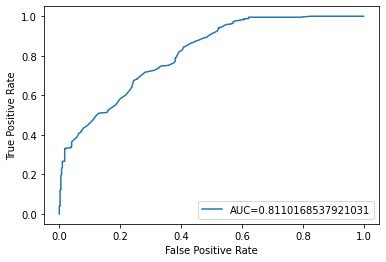

In [ ]:
#define metrics
y_pred_proba = abc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
model_acc =pd.DataFrame({'Model Name':['AdaBoostClassifier'],'Accuracy':[Accuracy_Score2]}) 
models_scores=models_scores.append(model_acc,ignore_index=True)
models_scores.sort_values(by=['Accuracy'],ascending=False,ignore_index=True)

,Model Name,Accuracy
0,DecisionTreeClassifier,76.25
1,AdaBoostClassifier,69.75


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Define Gradient Boosting Classifier with hyperparameters

gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC

gbc.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [ ]:
prediction=gbc.predict(X_test)
Accuracy_Score3 = accuracy_score(Y_test,prediction)*100
print("Acccuracy =", Accuracy_Score3)
print(f"Accuracy Score = {accuracy_score(Y_test,prediction)*100}")
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,prediction)}")
print(f"Classification Report =\n {classification_report(Y_test,prediction)}")

Acccuracy = 78.625
Accuracy Score = 78.625
Confusion Matrix =
 [[294 100]
 [ 71 335]]
Classification Report =
               precision    recall  f1-score   support

           0       0.81      0.75      0.77       394
           1       0.77      0.83      0.80       406

    accuracy                           0.79       800
   macro avg       0.79      0.79      0.79       800
weighted avg       0.79      0.79      0.79       800



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


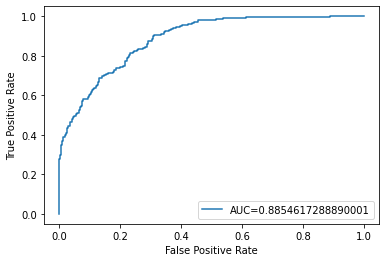

In [ ]:
#define metrics
y_pred_proba = gbc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


In [ ]:
model_acc =pd.DataFrame({'Model Name':['GradientBoostingClassifier'],'Accuracy':[Accuracy_Score3]}) 
models_scores=models_scores.append(model_acc,ignore_index=True)
models_scores.sort_values(by=['Accuracy'],ascending=False,ignore_index=True)

,Model Name,Accuracy
0,GradientBoostingClassifier,78.625
1,DecisionTreeClassifier,76.250
2,AdaBoostClassifier,69.750


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KNeighborsClassifier()

In [ ]:
prediction=knn.predict(X_test)
Accuracy_Score4 = accuracy_score(Y_test,prediction)*100
print("Acccuracy =", Accuracy_Score4)
print(f"Confusion Matrix =\n {confusion_matrix(Y_test,prediction)}")
print(f"Classification Report =\n {classification_report(Y_test,prediction)}")

Acccuracy = 66.5
Confusion Matrix =
 [[233 161]
 [107 299]]
Classification Report =
               precision    recall  f1-score   support

           0       0.69      0.59      0.63       394
           1       0.65      0.74      0.69       406

    accuracy                           0.67       800
   macro avg       0.67      0.66      0.66       800
weighted avg       0.67      0.67      0.66       800



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


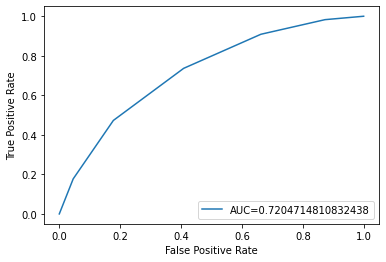

In [ ]:
#define metrics
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
model_acc =pd.DataFrame({'Model Name':['KNN'],'Accuracy':[Accuracy_Score4]}) 
models_scores=models_scores.append(model_acc,ignore_index=True)
models_scores.sort_values(by=['Accuracy'],ascending=False,ignore_index=True).style.background_gradient(subset=['Accuracy'])

,Model Name,Accuracy
0,GradientBoostingClassifier,78.625000
1,DecisionTreeClassifier,76.250000
2,AdaBoostClassifier,69.750000
3,KNN,66.500000
